# Neural Network Regression

# Exploring and Processing the Data

We first have to read in the CSV file that we've been given. We'll use a package called pandas for that:

In [1]:
#!conda install pandas
#!pip3 install pandas
import pandas as pd

Here we enter the path to out data. It is *very* important to get this correct.

In [2]:
df = pd.read_csv('./house-prices-example.csv')
df = df.iloc[:,1:] #remove former index column because irrelevant noise

Now we can look at the top 10 items in the dataframe. Notice the 13 different variables we have. We will use the first 12 to predict the final value, the tax appraisal.

In [3]:
df.head(10)

,lotsizesquarefeet,buildingqualitytypeid,calculatedbathnbr,bathroomcnt,bedroomcnt,regionidcity,regionidneighborhood,regionidzip,yearbuilt,roomcnt,lotsizesquarefeet.1,calculatedfinishedsquarefeet,structuretaxvaluedollarcnt
0,40247.0,7.0,2.0,2.0,2.0,12447.0,13327.0,96072.0,2004.0,0.0,40247.0,1090.0,232897.0
1,5420.0,4.0,2.0,2.0,4.0,12447.0,268496.0,96018.0,1957.0,0.0,5420.0,1931.0,124789.0
2,9085.0,8.0,2.0,2.0,3.0,12447.0,268588.0,96339.0,1962.0,0.0,9085.0,1766.0,120205.0
3,34845.0,9.0,3.0,3.0,5.0,12447.0,268588.0,96339.0,1995.0,0.0,34845.0,3085.0,378688.0
4,11009.0,8.0,3.0,3.0,5.0,12447.0,268588.0,96339.0,1965.0,0.0,11009.0,2401.0,162046.0
5,12910.0,7.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1984.0,0.0,12910.0,2397.0,274403.0
6,10095.0,7.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1981.0,0.0,10095.0,2574.0,239616.0
7,11119.0,8.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1965.0,0.0,11119.0,2225.0,208572.0
8,9787.0,7.0,3.0,3.0,4.0,12447.0,268588.0,96339.0,1983.0,0.0,9787.0,2661.0,258245.0
9,8280.0,6.0,3.0,3.0,4.0,12447.0,268588.0,96342.0,1960.0,0.0,8280.0,1830.0,132311.0


The dataset that we have now is in what we call a pandas dataframe. However, arrays are easier to use for analytics and data mining. So, to convert it to an array, simply access its values:

In [4]:
dataset = df.values

In [5]:
dataset

array([[4.02470e+04, 7.00000e+00, 2.00000e+00, ..., 4.02470e+04,
        1.09000e+03, 2.32897e+05],
       [5.42000e+03, 4.00000e+00, 2.00000e+00, ..., 5.42000e+03,
        1.93100e+03, 1.24789e+05],
       [9.08500e+03, 8.00000e+00, 2.00000e+00, ..., 9.08500e+03,
        1.76600e+03, 1.20205e+05],
       ...,
       [4.65600e+03, 4.00000e+00, 2.00000e+00, ..., 4.65600e+03,
        1.11400e+03, 6.82760e+04],
       [4.84000e+03, 4.00000e+00, 2.00000e+00, ..., 4.84000e+03,
        1.43600e+03, 9.51010e+04],
       [4.07900e+03, 6.00000e+00, 2.00000e+00, ..., 4.07900e+03,
        1.27000e+03, 6.36380e+04]])

Now, we split the dataset into our input features and the label we wish to predict.

In [6]:
X = dataset[:,0:12]
Y = dataset[:,12]

In [7]:
X.shape

(904287, 12)

In [8]:
Y.shape

(904287,)

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. We'll use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [9]:
#!conda install sklearn
#!pip3 install sklearn

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [12]:
X_scale

array([[6.09901968e-03, 5.45454545e-01, 5.26315789e-02, ...,
        0.00000000e+00, 6.09901968e-03, 1.83893683e-02],
       [8.02394530e-04, 2.72727273e-01, 5.26315789e-02, ...,
        0.00000000e+00, 8.02394530e-04, 3.25908914e-02],
       [1.35978194e-03, 6.36363636e-01, 5.26315789e-02, ...,
        0.00000000e+00, 1.35978194e-03, 2.98046235e-02],
       ...,
       [6.86202449e-04, 2.72727273e-01, 5.26315789e-02, ...,
        0.00000000e+00, 6.86202449e-04, 1.87946436e-02],
       [7.14185882e-04, 2.72727273e-01, 5.26315789e-02, ...,
        0.00000000e+00, 7.14185882e-04, 2.42320877e-02],
       [5.98450052e-04, 4.54545455e-01, 5.26315789e-02, ...,
        0.00000000e+00, 5.98450052e-04, 2.14289333e-02]])

Lastly, we wish to set aside some parts of our dataset for a validation set and a test set. We use the function train_test_split from scikit-learn to do that.

In [13]:
from sklearn.model_selection import train_test_split

First, we split the training data. The remaining 30% of the data is used for testing and validation.

In [14]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

So, we next need to split our training and validation data.

In [15]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [16]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(633000, 12) (135643, 12) (135644, 12) (633000,) (135643,) (135644,)


# Building and Training Our First Neural Network

We will be using Keras to build our architecture. Let's import the code from Keras that we will need to use:

In [17]:
#!conda install tensorflow
!pip3 install tensorflow

In [18]:
from tensorflow import keras

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [19]:
model = keras.models.Sequential([
    keras.layers.Dense(12, activation='elu', input_shape=(12,)),
    keras.layers.Dense(32, activation='elu'),    
    keras.layers.Dense(16, activation='elu'),
    keras.layers.Dense(1, activation='linear'),
])

/Users/g/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [20]:
adam = keras.optimizers.Adam()#lr=0.001)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [21]:
hist = model.fit(X_train, Y_train,
          batch_size=1024, epochs=30,
          validation_data=(X_val, Y_val))

Epoch 1/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 71247757312.0000 - mae: 172852.0938 - mse: 71247781888.0000 - val_loss: 71002660864.0000 - val_mae: 164257.3438 - val_mse: 70959800320.0000
Epoch 2/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 64219353088.0000 - mae: 153591.5781 - mse: 64219471872.0000 - val_loss: 51011612672.0000 - val_mae: 105283.6172 - val_mse: 50972381184.0000
Epoch 3/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - loss: 44504051712.0000 - mae: 98038.3750 - mse: 44503666688.0000 - val_loss: 40960864256.0000 - val_mae: 97894.2969 - val_mse: 40926068736.0000
Epoch 4/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 38268170240.0000 - mae: 99232.4922 - mse: 38268276736.0000 - val_loss: 39299948544.0000 - val_mae: 94551.2812 - val_mse: 39266099200.0000
Epoch 5/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - loss: 33909741568.0000 - mae: 88994.7422 - mse: 33909792768.0000 - val_loss: 32639926272.0000 - val_mae: 79156.6016 - val_mse: 32611072000.000

Understanding our results:

In [22]:
df.structuretaxvaluedollarcnt.mean()

172874.90233189243

# Visualizing Loss and Accuracy

Import the relevant package we need to do the visualization

In [23]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

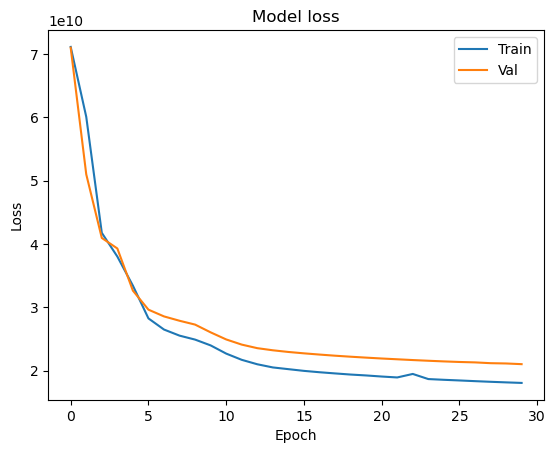

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Now we can computer performance on the test set, to see how the model performs on real data that hasn't been seen before.

In [25]:
predictions = model.predict(X_test)

4239/4239 ━━━━━━━━━━━━━━━━━━━━ 1s 269us/step


In [26]:
#!conda install numpy
!pip3 install numpy

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
import numpy as np

In [28]:
mean_absolute_error(Y_test, predictions)

68312.30360853969

In [29]:
mean_squared_error(Y_test, predictions)
math.sqrt(mean_squared_error(Y_test, predictions))

129479.40243723133

# Assignment #1

Try to improve the performance of the model that was trained by changing some parameters or hyperparameters. Recall our in class example of neural networks. 

Once you have improved on the MSE from the model that we created in class, explain the steps you took in the box below, then save this file as a pdf and submit it. The top five best performing models will get 10 points extra credit (equal to one point on your final grade). 

You also need to provide a link to ChatGPT or some generative AI tool that you used to try to minimize the loss (either RMSE, MSE, or MAE).

Enter your answer here.